# Chapter 4

In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import seaborn as sns
import pystan
import arviz

SEED = 1234
np.random.seed(SEED)
sns.set()

In [2]:
N_1 = 30
N_2 = 20
Y_1 = np.random.normal(0, 5, N_1)
Y_2 = np.random.normal(1, 4, N_2)

In [3]:
Y_1

array([ 2.35717582e+00, -5.95487847e+00,  7.16353484e+00, -1.56325948e+00,
       -3.60294367e+00,  4.43581470e+00,  4.29794207e+00, -3.18261752e+00,
        7.84818606e-02, -1.12134248e+01,  5.75017862e+00,  4.95973011e+00,
        4.76662064e+00, -1.01062741e+01, -1.67038683e+00,  1.05918234e-02,
        2.02726706e+00,  1.44545970e+00,  6.60579096e+00, -7.73452777e+00,
       -1.01323162e+00, -3.27984672e+00,  9.67106882e-01,  2.76719455e+00,
        6.59075777e+00, -2.34652642e+00,  3.37777043e+00, -9.08513613e+00,
       -9.15542701e-01,  5.29484594e+00])

In [4]:
Y_2

array([-0.59136091,  2.34975061,  5.19031429,  5.18375302,  4.45486917,
        0.5116337 ,  1.49885182, -0.29117922,  4.36669885, 10.56384206,
        1.30479835, -1.26578372,  1.14456775, -7.2999104 ,  1.9911688 ,
       -2.58862714,  0.45282067,  1.07315677,  4.02165593,  1.86107432])

## (1)

In [5]:
Y_1_df = pd.DataFrame({'Group': 1, 'Y': Y_1})
Y_2_df = pd.DataFrame({'Group': 2, 'Y': Y_2})
data_df = pd.concat([Y_1_df, Y_2_df])

<AxesSubplot:xlabel='Group', ylabel='Y'>

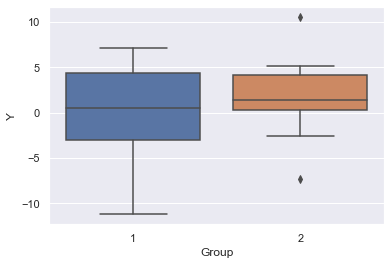

In [6]:
sns.boxplot(x='Group', y='Y', data=data_df)

<AxesSubplot:>

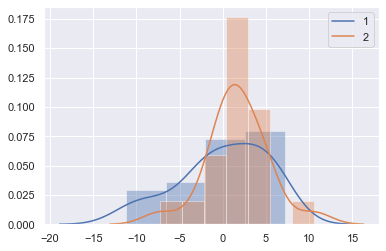

In [7]:
sns.distplot(Y_1, kde_kws={'label': 1})
sns.distplot(Y_2, kde_kws={'label': 2})

## (2)

\begin{align}
Y_1[n] &\sim \mathrm{Normal}(\mu_1, \sigma) \quad n = 1, \dots, N_1  \\
Y_2[n] &\sim \mathrm{Normal}(\mu_2, \sigma) \quad n = 1, \dots, N_2
\end{align}

## (3)

In [8]:
!cat ../model/exercise-3.stan

data {
  int N_1;
  int N_2;
  real Y_1[N_1];
  real Y_2[N_2];
}

parameters {
  real mu_1;
  real mu_2;
  real<lower=0> sigma;
}

model {
  for (n in 1:N_1) {
    Y_1[n] ~ normal(mu_1, sigma);
  }

  for (n in 1:N_2) {
    Y_2[n] ~ normal(mu_2, sigma);
  }
}


In [9]:
model = pystan.StanModel(file='../model/exercise-3.stan')

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_500918e66ebed802271a11b5467c5b20 NOW.


In [10]:
data = {'N_1': N_1, 'N_2': N_2, 'Y_1': Y_1, 'Y_2': Y_2}

In [11]:
fit = model.sampling(data, seed=SEED, n_jobs=1)

In [12]:
fit

Inference for Stan model: anon_model_500918e66ebed802271a11b5467c5b20.
4 chains, each with iter=2000; warmup=1000; thin=1; 
post-warmup draws per chain=1000, total post-warmup draws=4000.

        mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
mu_1    0.03    0.01   0.82  -1.61  -0.52   0.03   0.59   1.67   3704    1.0
mu_2     1.7    0.02   1.06  -0.37    1.0   1.69   2.41   3.73   3864    1.0
sigma   4.71  8.4e-3    0.5   3.87   4.37   4.66   5.01   5.82   3516    1.0
lp__  -100.2    0.03   1.26 -103.6 -100.7 -99.87 -99.31 -98.84   1907    1.0

Samples were drawn using NUTS at Fri Aug 28 01:01:03 2020.
For each parameter, n_eff is a crude measure of effective sample size,
and Rhat is the potential scale reduction factor on split chains (at 
convergence, Rhat=1).

array([[<AxesSubplot:title={'center':'mu_1'}>,
        <AxesSubplot:title={'center':'mu_1'}>],
       [<AxesSubplot:title={'center':'mu_2'}>,
        <AxesSubplot:title={'center':'mu_2'}>],
       [<AxesSubplot:title={'center':'sigma'}>,
        <AxesSubplot:title={'center':'sigma'}>]], dtype=object)

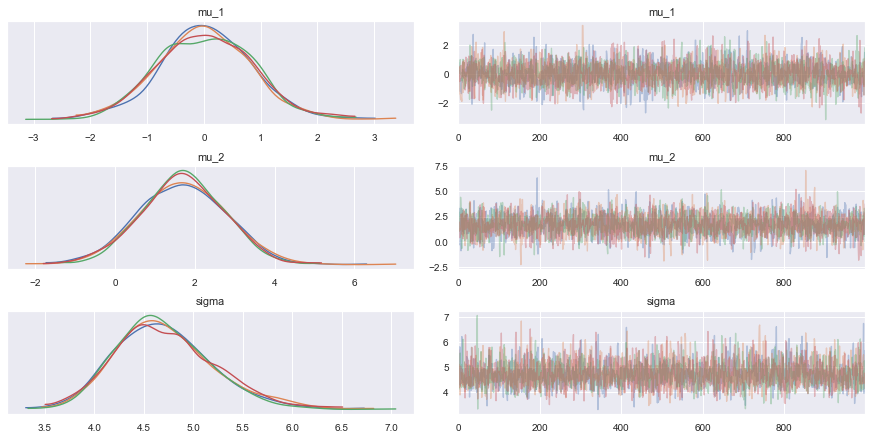

In [13]:
arviz.plot_trace(fit)

array([[<AxesSubplot:ylabel='mu_1'>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:ylabel='mu_2'>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:xlabel='mu_1', ylabel='sigma'>,
        <AxesSubplot:xlabel='mu_2'>, <AxesSubplot:xlabel='sigma'>]],
      dtype=object)

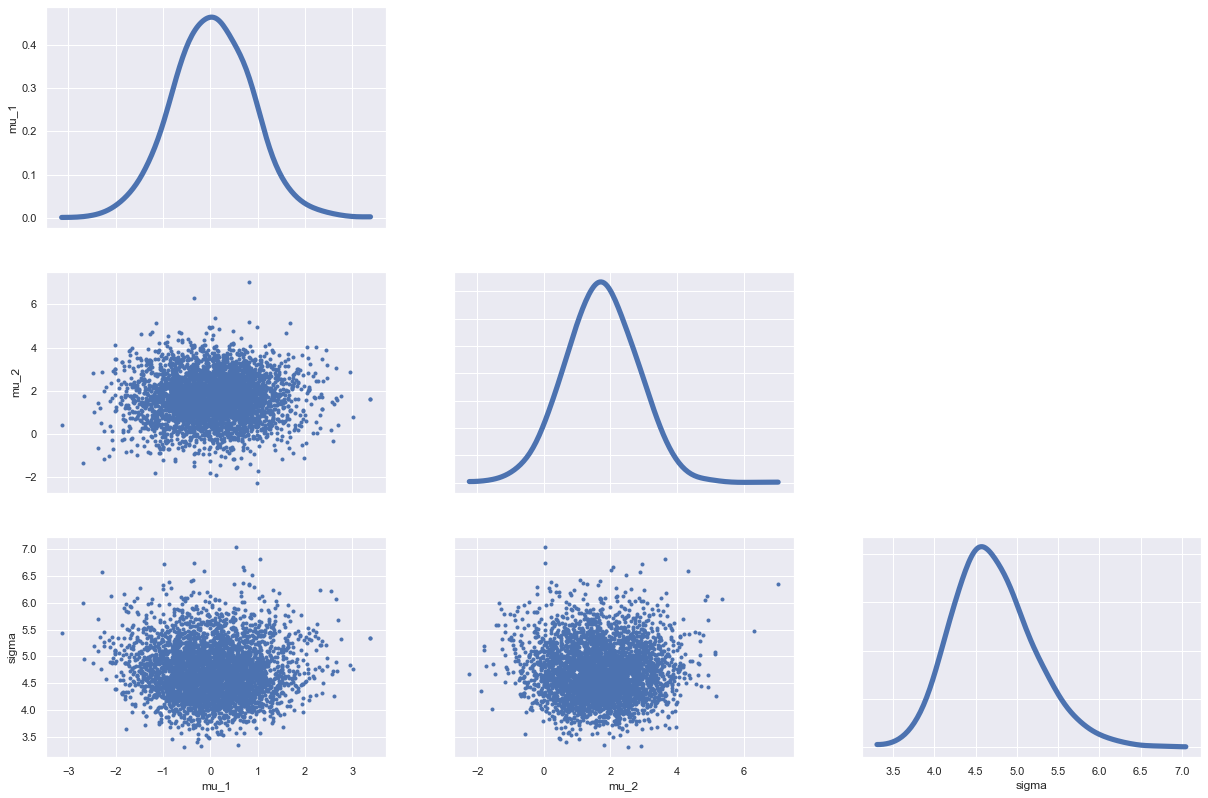

In [14]:
arviz.plot_pair(fit, marginals=True)

## (4)

In [15]:
df = fit.to_dataframe()
df

,chain,draw,warmup,mu_1,mu_2,sigma,lp__,accept_stat__,stepsize__,treedepth__,n_leapfrog__,divergent__,energy__
0,0,0,0,-0.072087,1.399822,3.764618,-100.792940,0.998836,0.766527,6,127,0,101.544637
1,0,1,0,0.832380,2.478832,5.735246,-101.464445,0.970868,0.766527,6,67,0,101.773555
2,0,2,0,-0.092351,2.703517,5.195179,-99.902182,0.996936,0.766527,2,3,0,101.818145
3,0,3,0,0.238781,3.301975,5.136883,-100.391267,0.840228,0.766527,6,63,0,102.904809
4,0,4,0,-0.060515,2.807500,5.799818,-101.571656,0.912901,0.766527,2,3,0,102.382603
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,3,995,0,0.034088,2.077258,4.551929,-98.791925,1.000000,0.811573,2,3,0,98.865078
3996,3,996,0,-0.841137,0.726571,4.340782,-99.950854,0.758040,0.811573,2,3,0,100.649299
3997,3,997,0,0.901963,2.796395,4.750271,-99.840746,1.000000,0.811573,2,3,0,100.578318
3998,3,998,0,-0.665659,2.331052,4.728912,-99.309298,0.922116,0.811573,2,3,0,101.022366


In [16]:
(df['mu_2'] > df['mu_1']).mean()

0.9015

In [17]:
(fit['mu_2'] > fit['mu_1']).mean()

0.9015

## (5)

\begin{align}
Y_1[n] &\sim \mathrm{Normal}(\mu_1, \sigma_1) \quad n = 1, \dots, N_1  \\
Y_2[n] &\sim \mathrm{Normal}(\mu_2, \sigma_2) \quad n = 1, \dots, N_2
\end{align}

In [18]:
!cat ../model/exercise-5.stan

data {
  int N_1;
  int N_2;
  real Y_1[N_1];
  real Y_2[N_2];
}

parameters {
  real mu_1;
  real mu_2;
  real<lower=0> sigma_1;
  real<lower=0> sigma_2;
}

model {
  for (n in 1:N_1) {
    Y_1[n] ~ normal(mu_1, sigma_1);
  }

  for (n in 1:N_2) {
    Y_2[n] ~ normal(mu_2, sigma_2);
  }
}


In [19]:
model = pystan.StanModel(file='../model/exercise-5.stan')

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_6e9ce596431dff45db9cd78c9e982a22 NOW.


In [20]:
fit = model.sampling(data, seed=SEED, n_jobs=1)

In [21]:
fit

Inference for Stan model: anon_model_6e9ce596431dff45db9cd78c9e982a22.
4 chains, each with iter=2000; warmup=1000; thin=1; 
post-warmup draws per chain=1000, total post-warmup draws=4000.

          mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
mu_1      0.05    0.02   0.96  -1.83  -0.57   0.06   0.69   1.95   3569    1.0
mu_2      1.67    0.01   0.86 2.0e-4   1.08   1.68   2.23   3.35   3934    1.0
sigma_1   5.37    0.01   0.74   4.16   4.85   5.28   5.83    7.0   4090    1.0
sigma_2   3.86    0.01    0.7   2.77   3.37   3.74   4.23   5.56   3466    1.0
lp__    -97.87    0.04   1.46 -101.5 -98.59 -97.54  -96.8 -96.04   1726    1.0

Samples were drawn using NUTS at Fri Aug 28 01:01:41 2020.
For each parameter, n_eff is a crude measure of effective sample size,
and Rhat is the potential scale reduction factor on split chains (at 
convergence, Rhat=1).

array([[<AxesSubplot:title={'center':'mu_1'}>,
        <AxesSubplot:title={'center':'mu_1'}>],
       [<AxesSubplot:title={'center':'mu_2'}>,
        <AxesSubplot:title={'center':'mu_2'}>],
       [<AxesSubplot:title={'center':'sigma_1'}>,
        <AxesSubplot:title={'center':'sigma_1'}>],
       [<AxesSubplot:title={'center':'sigma_2'}>,
        <AxesSubplot:title={'center':'sigma_2'}>]], dtype=object)

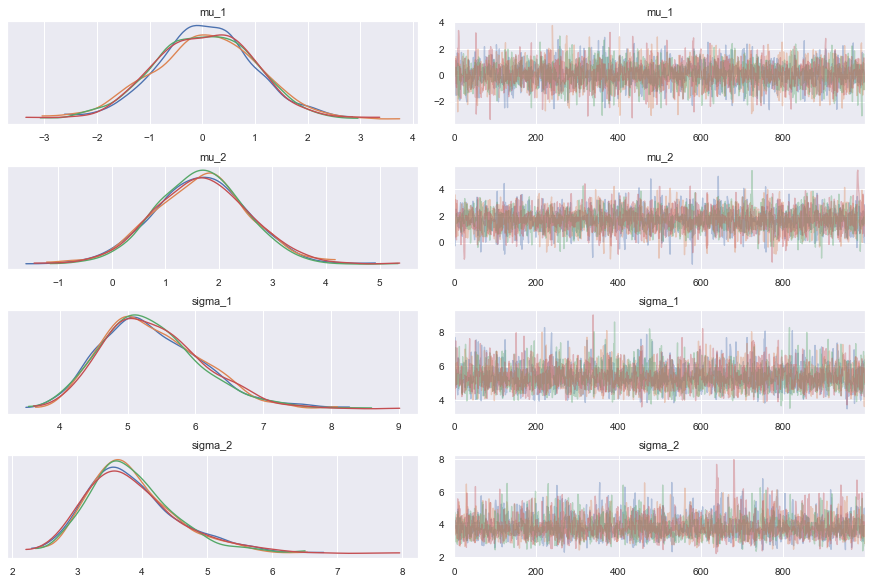

In [22]:
arviz.plot_trace(fit)

array([[<AxesSubplot:ylabel='mu_1'>, <AxesSubplot:>, <AxesSubplot:>,
        <AxesSubplot:>],
       [<AxesSubplot:ylabel='mu_2'>, <AxesSubplot:>, <AxesSubplot:>,
        <AxesSubplot:>],
       [<AxesSubplot:ylabel='sigma_1'>, <AxesSubplot:>, <AxesSubplot:>,
        <AxesSubplot:>],
       [<AxesSubplot:xlabel='mu_1', ylabel='sigma_2'>,
        <AxesSubplot:xlabel='mu_2'>, <AxesSubplot:xlabel='sigma_1'>,
        <AxesSubplot:xlabel='sigma_2'>]], dtype=object)

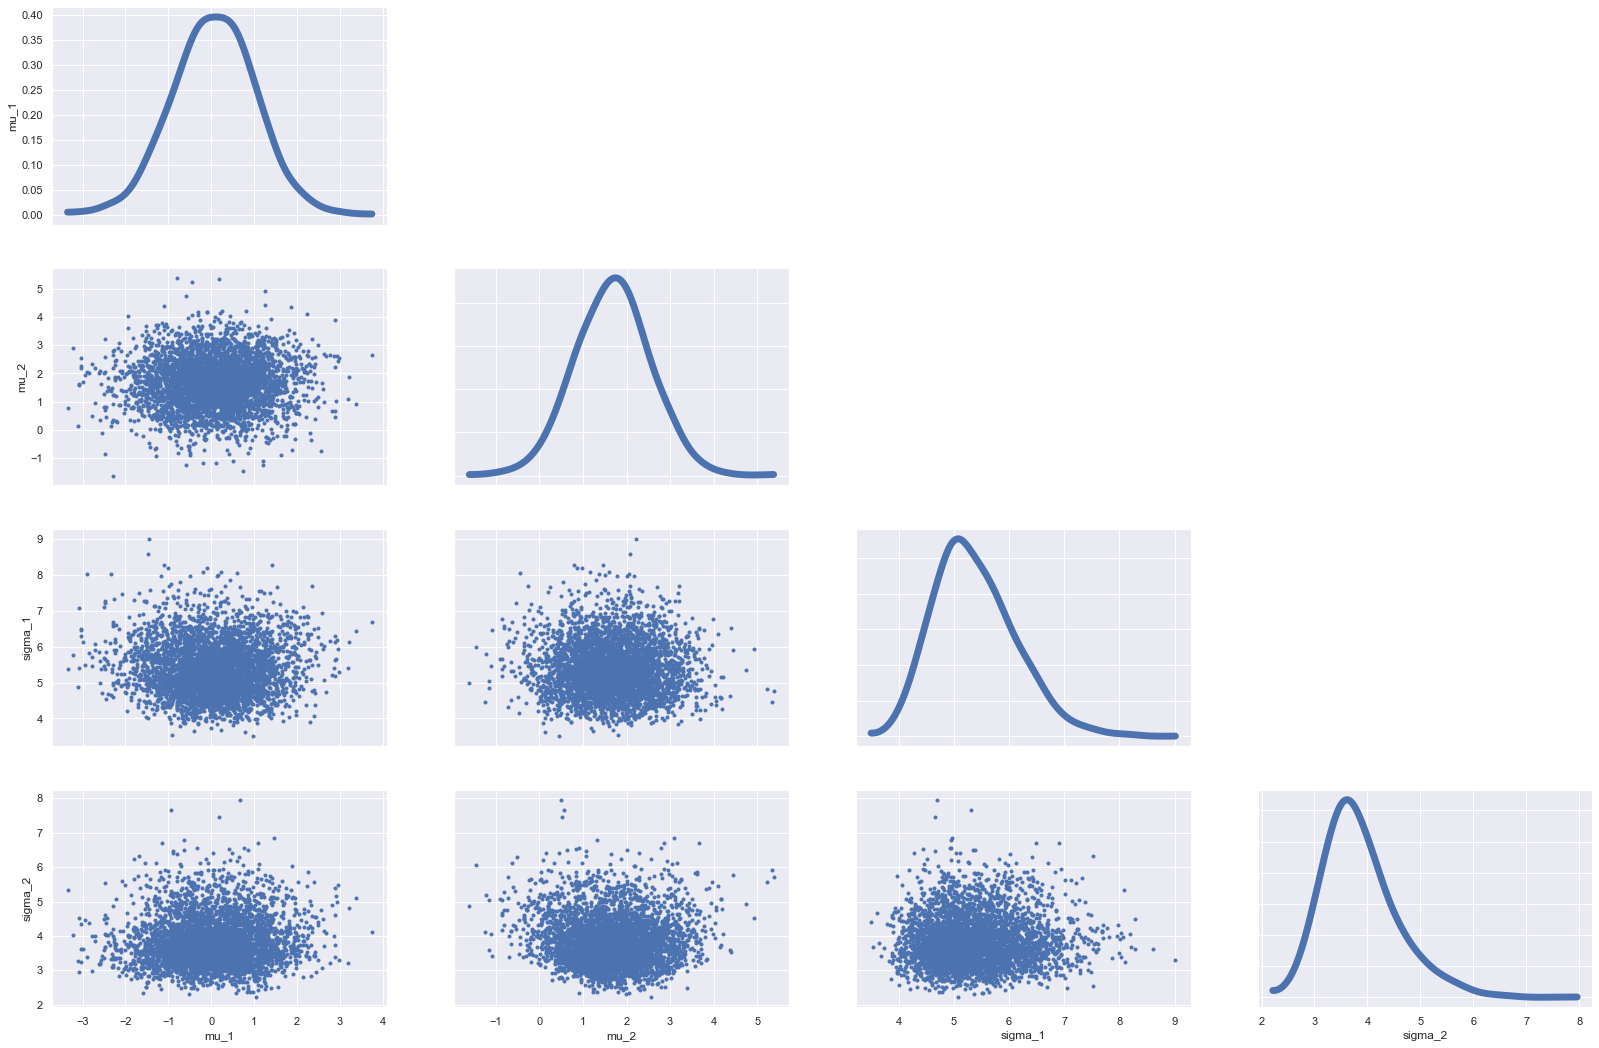

In [23]:
arviz.plot_pair(fit, marginals=True)

In [24]:
df = fit.to_dataframe()
df

,chain,draw,warmup,mu_1,mu_2,sigma_1,sigma_2,lp__,accept_stat__,stepsize__,treedepth__,n_leapfrog__,divergent__,energy__
0,0,0,0,-1.567937,2.588381,5.300136,4.135404,-98.024805,0.998086,0.534096,3,7,0,99.438854
1,0,1,0,-0.637665,2.570549,3.874695,4.546607,-100.408517,0.903664,0.534096,3,7,0,102.379239
2,0,2,0,-0.995172,-0.258568,7.700608,4.310714,-102.356441,0.766558,0.534096,3,7,0,106.942966
3,0,3,0,0.701417,2.058729,5.461370,4.109718,-96.518988,0.976819,0.534096,2,7,0,102.420167
4,0,4,0,1.083732,2.138845,5.572801,4.126855,-96.956500,0.984099,0.534096,2,3,0,97.101158
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,3,995,0,0.986985,2.403000,5.923952,4.156550,-97.369810,1.000000,0.715120,2,3,0,99.205615
3996,3,996,0,1.299773,2.740857,5.795783,3.255315,-98.112428,0.927779,0.715120,2,3,0,98.970175
3997,3,997,0,0.199647,1.333784,5.821449,4.131724,-96.641224,0.969624,0.715120,2,3,0,99.113635
3998,3,998,0,-0.492034,0.471616,5.017294,4.141855,-97.224948,0.904156,0.715120,3,7,0,99.170682


In [25]:
(df['mu_2'] > df['mu_1']).mean()

0.904

In [26]:
(fit['mu_2'] > fit['mu_1']).mean()

0.904